# Rate Detection

This Notebook exemplifies the rate detection algorithm. There are two examples: one with a short section of real EIT
data, and one with simulated data. Both examples are demonstrated with and without the refinement of the estimated
rates. 

In [1]:
from matplotlib import pyplot as plt

from eitprocessing.datahandling.loading import load_eit_data
from eitprocessing.features.rate_detection import RateDetection

MINUTE = 60

## Real EIT Data

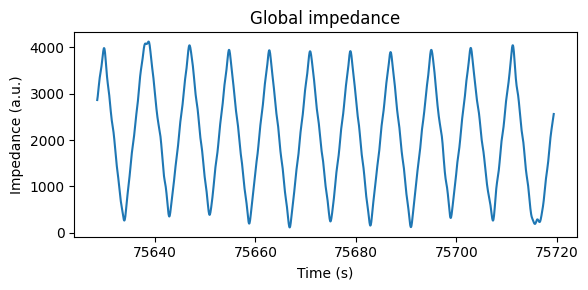

In [ ]:
sequence = load_eit_data("example_data.bin", vendor="draeger", sample_frequency=20, label="draeger1")
eit_data = sequence.eit_data["raw"]
global_impedance = eit_data.calculate_global_impedance()

fig, axis = plt.subplots(1, figsize=(6, 3))
axis.plot(eit_data.time, global_impedance, label="Global Impedance")
axis.set(xlabel="Time (s)", ylabel="Impedance (a.u.)", title="Global impedance")
fig.tight_layout()


Respiratory rate:
  estimated (peak):    8.0 bpm
  estimated (refined): 7.6 bpm

Heart rate:
  estimated (peak):    68.0 bpm
  estimated (refined): 67.6 bpm



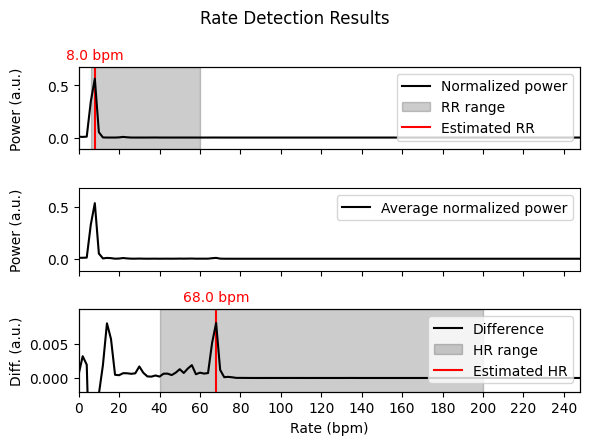

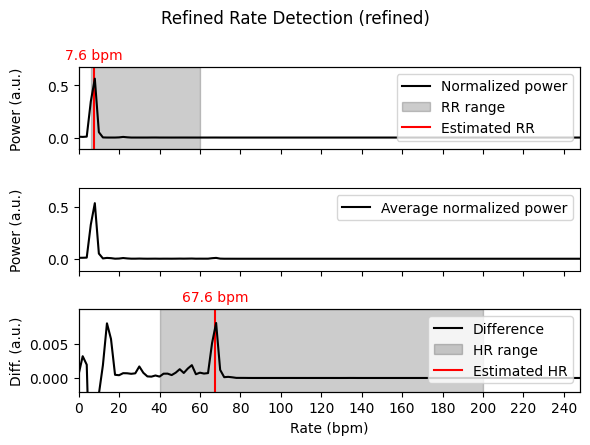

In [3]:
rd = RateDetection("adult", refine_estimated_frequency=False)
estimated_respiratory_rate, estimated_heart_rate = rd.apply(eit_data, captures=(captures := {}))
fig = rd.plotting.plot(**captures)

rd = RateDetection("adult")
estimated_respiratory_rate_refined, estimated_heart_rate_refined = rd.apply(eit_data, captures=(captures := {}))
fig = rd.plotting.plot(**captures)
fig.suptitle("Refined Rate Detection (refined)")

print(
    f"""
Respiratory rate:
  estimated (peak):    {estimated_respiratory_rate * MINUTE:.1f} bpm
  estimated (refined): {estimated_respiratory_rate_refined * MINUTE:.1f} bpm

Heart rate:
  estimated (peak):    {estimated_heart_rate * MINUTE:.1f} bpm
  estimated (refined): {estimated_heart_rate_refined * MINUTE:.1f} bpm
"""
)

## Simulated EIT Data

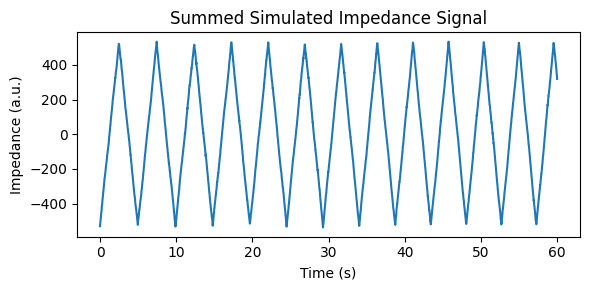

In [ ]:
from tests.test_rate_detection import generate_signal

base_respiratory_rate = 12 / MINUTE
base_heart_rate = 54 / MINUTE

# This function generates an EIT impedance-like signal for 32x32 pixels over time with a high power signal
# component (respiration), a low power signal component (cardiovascular action), and noise. The respiratory and heart
# rate slightly vary over time, starting at the base rate and increasing by 10% (respiratory rate) or decreasing by 5%
# (heart rate).
signal = generate_signal(
    high_power_frequencies=(base_respiratory_rate,),
    low_power_frequencies=(base_heart_rate,),
    duration=60,  # seconds
    sample_frequency=50.0,
    low_power_amplitude=0.01,  # approximate relative amplitude of the heart rate signal
    noise_amplitude=0.1,  # relative amplitude of the noise
    captures=(captures := {}),
    high_frequency_scale_factor=1.1,
    low_frequency_scale_factor=0.95,
)
fig, axis = plt.subplots(1, figsize=(6, 3))
axis.plot(captures["time"], captures["summed_impedance"], label="Summed Simulated Impedance Signal")
axis.set(xlabel="Time (s)", ylabel="Impedance (a.u.)", title="Summed Simulated Impedance Signal")
fig.tight_layout()


Respiratory rate:
  base:                12.0 bpm
  final:               13.2 bpm
  estimated (peak):    12.0 bpm
  estimated (refined): 12.4 bpm

Heart rate:
  base:                54.0 bpm
  final:               51.3 bpm
  estimated (peak):    52.0 bpm
  estimated (refined): 52.4 bpm



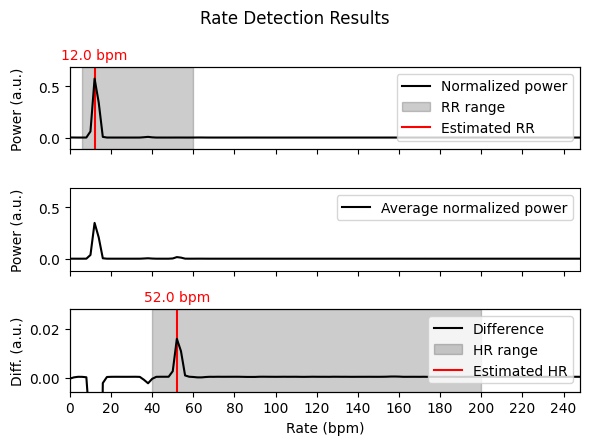

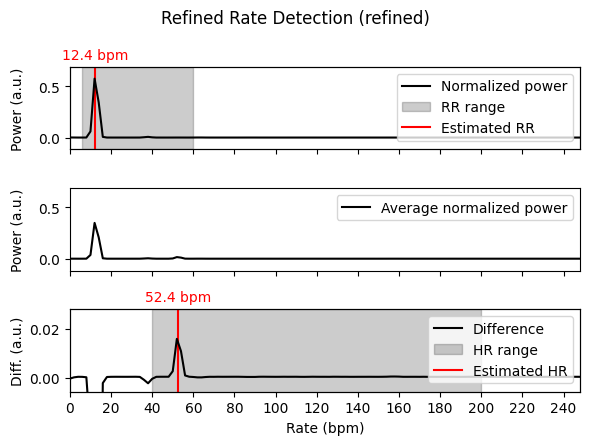

In [5]:
rd = RateDetection("adult", refine_estimated_frequency=False)
estimated_respiratory_rate, estimated_heart_rate = rd.apply(signal, captures=(captures := {}))
fig = rd.plotting.plot(**captures)

rd_refined = RateDetection("adult")
estimated_respiratory_rate_refined, estimated_heart_rate_refined = rd_refined.apply(
    signal, captures=(captures_refined := {})
)
fig = rd.plotting.plot(**captures_refined)
fig.suptitle("Refined Rate Detection (refined)")


print(
    f"""
Respiratory rate:
  base:                {base_respiratory_rate * MINUTE:.1f} bpm
  final:               {base_respiratory_rate * 1.1 * MINUTE:.1f} bpm
  estimated (peak):    {estimated_respiratory_rate * MINUTE:.1f} bpm
  estimated (refined): {estimated_respiratory_rate_refined * MINUTE:.1f} bpm

Heart rate:
  base:                {base_heart_rate * MINUTE:.1f} bpm
  final:               {base_heart_rate * 0.95 * MINUTE:.1f} bpm
  estimated (peak):    {estimated_heart_rate * MINUTE:.1f} bpm
  estimated (refined): {estimated_heart_rate_refined * MINUTE:.1f} bpm
"""
)